In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
pd.set_option('display.max_columns',None)


Using TensorFlow backend.


In [3]:
data=pd.read_csv('mushrooms.csv')

In [4]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


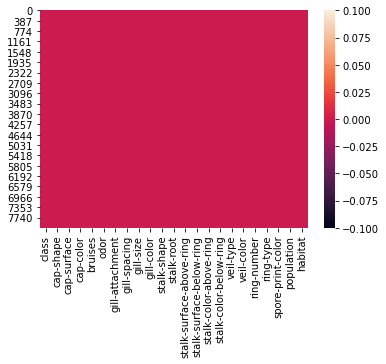

In [5]:
sns.heatmap(data.isnull())

In [6]:
a=data.groupby(['class','cap-shape']).size()
a

class  cap-shape
e      b             404
       f            1596
       k             228
       s              32
       x            1948
p      b              48
       c               4
       f            1556
       k             600
       x            1708
dtype: int64

In [7]:
a=data.copy()

In [8]:
from collections import defaultdict
d=defaultdict(LabelEncoder)
fit=a.apply(lambda x: d[x.name].fit_transform(x))

In [9]:
X=fit.iloc[:,1:]
y=fit.iloc[:,0]

In [10]:
onehotencoder=OneHotEncoder(sparse=False)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
X_train=onehotencoder.fit_transform(X_train)
X_test=onehotencoder.transform(X_test)

In [13]:
model=Sequential()
model.add(Dense(input_dim=117,activation='sigmoid',units=128))
model.add(Dropout(0.2))
model.add(Dense(activation='sigmoid',units=64))
model.add(Dense(activation='sigmoid',units=1))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
         epochs=20,batch_size=25)

Train on 6499 samples, validate on 1625 samples
Epoch 1/20
6499/6499 [==============================] - 1s 95us/step - loss: 0.2763 - accuracy: 0.8935 - val_loss: 0.0519 - val_accuracy: 0.9895
Epoch 2/20
6499/6499 [==============================] - 0s 47us/step - loss: 0.0374 - accuracy: 0.9905 - val_loss: 0.0123 - val_accuracy: 0.9982
Epoch 3/20
6499/6499 [==============================] - 0s 47us/step - loss: 0.0125 - accuracy: 0.9983 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 4/20
6499/6499 [==============================] - 0s 44us/step - loss: 0.0065 - accuracy: 0.9988 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 5/20
6499/6499 [==============================] - 0s 46us/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6/20
6499/6499 [==============================] - 0s 44us/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 9.0645e-04 - val_accuracy: 1.0000
Epoch 7/20
6499/6499 [==============================] - 0s 53us/step - loss: 0

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               15104     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 23,425
Trainable params: 23,425
Non-trainable params: 0
_________________________________________________________________


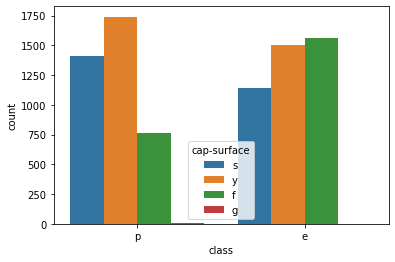

In [16]:
sns.countplot(data['class'],hue=data['cap-surface'])

In [17]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

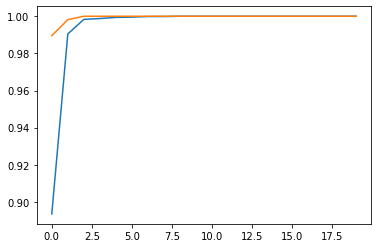

In [19]:
pl.plot(acc)
pl.plot(val_acc)


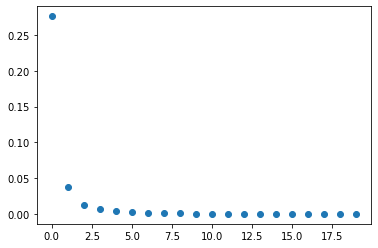

In [20]:
pl.scatter(range(len(loss)),loss)

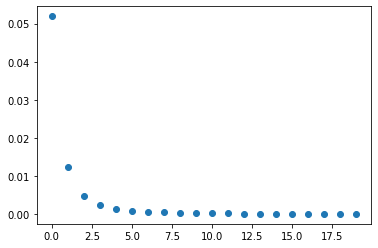

In [21]:
pl.scatter(range(len(val_loss)),val_loss)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dec_tree=DecisionTreeClassifier()

In [24]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
dec_tree.score(X_train,y_train)

1.0

In [26]:
dec_tree.score(X_test,y_test)

1.0

In [27]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()

In [28]:
logistic.fit(X_train,y_train)
logistic.score(X_train,y_train),logistic.score(X_test,y_test)

(1.0, 1.0)

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
dec_tree.score(X_train,y_train),dec_tree.score(X_test,y_test)

(1.0, 1.0)

In [31]:
logistic=LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)
logistic.score(X_train,y_train),logistic.score(X_test,y_test)

(0.9495306970303123, 0.952)

In [32]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

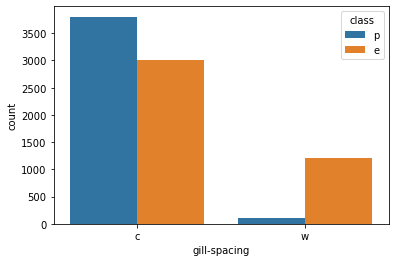

In [33]:
sns.countplot(data['gill-spacing'],hue=data['class'])

In [34]:
(3/5)*(1/5)*(4/5)*(3/5)*(5/14)

0.02057142857142857

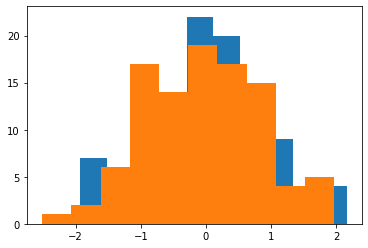

In [82]:
a=np.random.randn(100)
pl.hist(a)
b=np.random.randn(100)
pl.hist(b)
pl.show()

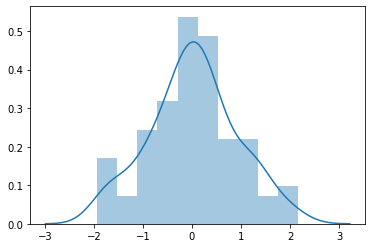

In [88]:
sns.distplot(a)
# sns.distplot(b)


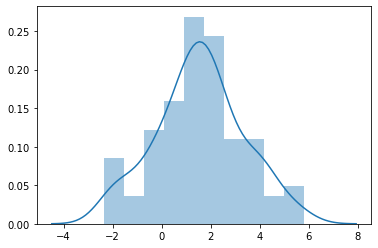

In [90]:
sns.distplot(2*a+1.5)

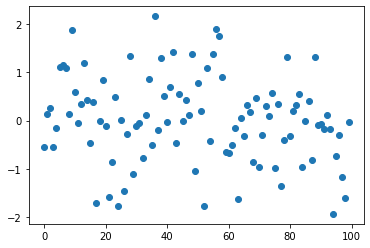